[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/samdavanloo/ISE-ML/blob/main/4_svm.ipynb)

# Classification: Support Vector Machines (SVM)
## Linear SVMs or Maximal Margin Classifiers
The idea behind maximal margin classifiers is to find a separating hyperplane with maximum margin. The margin is defined as the distance between the separating hyperplane (decision boundary) and the training samples that are closest to this hyperplane, which are the so-called "support vectors". The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting.

Following the lecture notes, the optimzition problem behind the maximal margin classifeir (linear SVM) is
$$
\min_{\mathbf{w}\in\mathbb{R}^p,w_0\in\mathbb{R}} \ ||\mathbf{w}||_2^2 \quad \text{s.t.} \quad y_i(w_0+\mathbf{w}^\top\mathbf{x}_i)>1, \ i=1,\cdots, n.
$$

## Linear SVMs with soft margins
Linear constraints need to be relaxed for nonlinearly separable data to allow the convergence of the optimization. Vapnik (1995) introduced nonnegative "slack variables" to allow misclassification for some of the training data points. Follwoing the lecture notes, the optimization problem behind soft margin linear SVM is
$$
\min_{\mathbf{w}\in\mathbb{R}^p,w_0\in\mathbb{R}} \ ||\mathbf{w}||_2^2+C\sum_{i=1}^n\xi_i \quad \text{s.t.} \quad y_i(w_0+\mathbf{w}^\top\mathbf{x}_i)>1-\xi_i, \ \xi_i\geq 0, i=1,\cdots, n,
$$
for some constant $C>0$. The "unconstrained formulation" of this problem can also be written as
$$
\min_{\mathbf{w}\in\mathbb{R}^p,w_0\in\mathbb{R}} \ ||\mathbf{w}||_2^2+C\sum_{i=1}^n \max\{1-y_i(w_0+\mathbf{w}^\top\mathbf{x}_i),0\},
$$
which is the summation of the $\ell_2$-norm and the hinge loss.

Given the constrained or nonsmooth nature of these two problems, the optimization algorithms to solve them are out of the scope of this lecture. Below, we have implemented linear SVMs on the Iris dataset. Let's first build the data.

In [1]:
import pandas as pd

: 

: 

In [3]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


Class labels: [0 1 2]


In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=colors[idx],
        marker=markers[idx], label=cl,
        edgecolor='black')
        
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],c="g", edgecolor='black', 
        alpha=1.0,linewidth=1, marker='o',s=100, label='test set')


/var/folders/rq/q3zt2fw92l9g0b4jzz8zr5rh0000gn/T/ipykernel_32040/2021504068.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


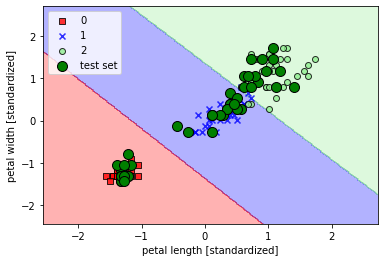

In [6]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


## Nonlinear SVM (Kernel SVM)
Kernel SVMs are particularly useful when classes are not linearly separable as motivated in the follwoing example. Using the following code, we will create a simple dataset that has the form of an XOR gate using the "logical_or" function from NumPy.

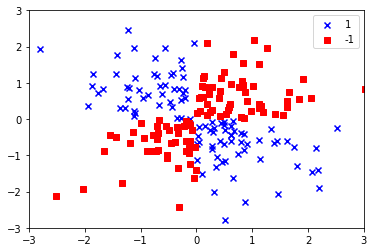

In [7]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],X_xor[y_xor == 1, 1],c='b', marker='x',label='1')
plt.scatter(X_xor[y_xor == -1, 0],X_xor[y_xor == -1, 1],c='r',marker='s',label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

Obviously, we would not be able to separate samples using a linear hyperplane as the decision boundary. Follwoing the discussion in the lecture, nonlinear SVMs project the feature space onto a higher dimensional space (using a mapping $\phi$) in which classes are linearly separable. However, one problem with this mapping approach is that the solution of the above optimization problems in the new feature space are computationally very expensive, especially if the new feature space has a very high dimension. This is were the so-called "kernel trick" comes into play.

In practice, the solution of SVM in the new feature space mainly requires $<\phi(\mathbf{x}_i),\phi(\mathbf{x}_j)>,\ \forall (i,j)$, which are eased by kernel functions $K(\mathbf{x}_i,\mathbf{x}_j)$, e.g., Gaussian (radial basis) kernel, polynomial kernel, exponential kernel, which measure similarity of samples. 
 

/var/folders/rq/q3zt2fw92l9g0b4jzz8zr5rh0000gn/T/ipykernel_32040/2021504068.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


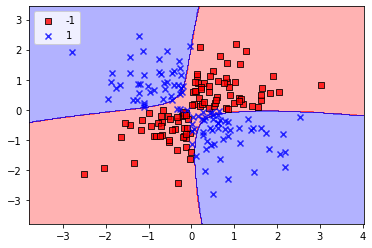

In [8]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

The radial basis function (RBF) kernel fitted above has the form of
$$
K(\mathbf{x}_i,\mathbf{x}_j) = \exp(-\gamma||\mathbf{x}_i-\mathbf{x}_j||^2_2).
$$
The $\gamma$ parameter controls the influence of the training samples. To get a better intuition, let us fit the RBF kernel SVM to the Iris dataset with relatively low $\gamma$ value:

/var/folders/rq/q3zt2fw92l9g0b4jzz8zr5rh0000gn/T/ipykernel_32040/2021504068.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


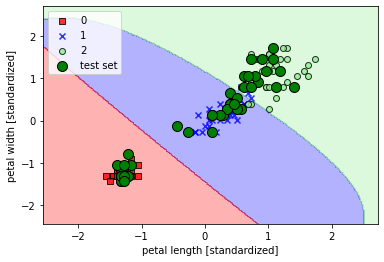

In [9]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Now, let us increase the value of $\gamma$ and see its effect on the decision boundary.

/var/folders/rq/q3zt2fw92l9g0b4jzz8zr5rh0000gn/T/ipykernel_32040/2021504068.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


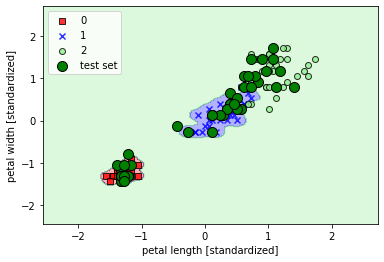

In [10]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

As we can see, the decision bounady becomes much tighter and less smooth. Although the model fits the training dataset very well, such a classifier will likely have a high generalization error. This illustrates that the $\gamma$ parameter
also plays an important role in controlling overfitting.